In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context("talk")

# Numpy Array 

In [2]:
import numpy as np

As you learned in homework one the `np.array` is the key data structure in numpy for dense arrays of data.

---

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Array Creation

* From a list

In [3]:
np.array([[1.,2.], [3.,4.]])

array([[ 1.,  2.],
       [ 3.,  4.]])

In [4]:
np.array([["A", "matrix"], ["of", "words."]])

array([['A', 'matrix'],
       ['of', 'words.']], 
      dtype='<U6')

* All zeros (what shape?)

In [5]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

* All ones

In [6]:
np.ones([3,2])

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [7]:
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

* From a range:

In [8]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

In [9]:
np.arange(np.datetime64('2016-12-31'), np.datetime64('2017-02-01'))

array(['2016-12-31', '2017-01-01', '2017-01-02', '2017-01-03',
       '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07',
       '2017-01-08', '2017-01-09', '2017-01-10', '2017-01-11',
       '2017-01-12', '2017-01-13', '2017-01-14', '2017-01-15',
       '2017-01-16', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-21', '2017-01-22', '2017-01-23',
       '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27',
       '2017-01-28', '2017-01-29', '2017-01-30', '2017-01-31'], dtype='datetime64[D]')

In [10]:
np.linspace(0, 5, 10)

array([ 0.        ,  0.55555556,  1.11111111,  1.66666667,  2.22222222,
        2.77777778,  3.33333333,  3.88888889,  4.44444444,  5.        ])

Learn more about working with [datetime objects](https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html#).

* A random array (more on randomness later)

In [11]:
np.random.randn(3,2)

array([[ 1.78228819, -2.29124799],
       [-0.57398934,  0.78135893],
       [ 0.04167533, -0.93639905]])

In [12]:
np.random.permutation(10)

array([3, 5, 8, 2, 7, 6, 1, 0, 9, 4])

---

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Properties of Arrays

### Shape

In [13]:
A = np.array([[1.,2., 3.], [4.,5., 6.]])
print(A)
A.shape

[[ 1.  2.  3.]
 [ 4.  5.  6.]]


(2, 3)

### Type

In [14]:
A.dtype

dtype('float64')

In [15]:
np.arange(1,5).dtype

dtype('int64')

In [16]:
(np.array([True, False])).dtype

dtype('bool')

In [17]:
np.array(["Hello", "World!"]).dtype

dtype('<U6')

<details>
<summary> What does <code>'<U6'</code>mean?</summary>
<ul>
<li> <code> < </code>little endian </li>
<li> <code> U </code>Unicode </li>
<li> <code> 6 </code>length of longest string </li>
</u>
</details>

#### and we can change the type of an array:

In [18]:
np.array([1,2,3]).astype(float)

array([ 1.,  2.,  3.])

In [19]:
np.array(["1","2","3"]).astype(int)

array([1, 2, 3])

Learn more about numpy [array types](https://docs.scipy.org/doc/numpy/user/basics.types.html)

---

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Jagged Arrays

Is the following valid?

In [20]:
A = np.array([[1, 2, 3], [4, 5], [6]])
A

array([[1, 2, 3], [4, 5], [6]], dtype=object)

What happened? 

In [21]:
A.shape

(3,)

In [22]:
print(A.dtype)

object


In [23]:
print(A[0])
print(A[1])
print(A[2])

[1, 2, 3]
[4, 5]
[6]


 <img src="http://csharpcorner.mindcrackerinc.netdna-cdn.com/UploadFile/955025/C-Sharp-interview-question-part2/Images/jagged%20array.png">

### Jagged arrays can be problematic:

1. Difficult to index (extract columns).
```python
A[0,1] 
 > Error
A[0][1] 
 > 2
```
1. Not as efficiently represented in contiguous memory.


<details>
<summary>Some solutions</summary>
<code>
pd.Series(A).apply(lambda x: pd.Series(x))
np.vectorize(lambda x: x[0])(A)
</code>
</details>




---

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Reshaping

Often you will need to reshape matrices.  

Suppose you have the following array:

In [24]:
np.arange(1,13)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

**What will the following produce:**

```python
np.arange(1,13).reshape(4,3)
```

**Option A:**

```python
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])
```

**Option B:**

```python
array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])
```

<br/>
<br/>
<br/>

---

**Solution**

In [25]:
A = np.arange(1,13).reshape(4,3)
A

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

* You can also flatten a matrix

In [26]:
A.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

## Advanced: Array representation

Numpy stores data contiguously in memory

In [27]:
print(A.dtype)
A.data.tobytes()

int64


b'\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\t\x00\x00\x00\x00\x00\x00\x00\n\x00\x00\x00\x00\x00\x00\x00\x0b\x00\x00\x00\x00\x00\x00\x00\x0c\x00\x00\x00\x00\x00\x00\x00'

Numpy stores matrices in _row-major_ order (by rows)

In [28]:
print(np.arange(1,13).reshape(4,3, order='C'))
print()
print(np.arange(1,13).reshape(4,3, order='F'))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


<details>
<summary>What does the `'F'` mean?</summary>
**F**ortran ordering.  In BLAS libraries are specified for Fortran and C programming languages which differ both in the column (Fortran) or row (C) indexing.
</details>

---

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Slicing

From homework 1 you should already be pretty good at Slicing so let's test your slicing knowledge.

<img src="guessing_game.png" width="600px">

* **Program 1:**
```python
x[:, 0]
```
<details>
<summary>**Answer**</summary>
<p>B</p>
</details>

<br/>

* **Program 2:**
```python
x[0, :]
```
<details>
<summary>**Answer**</summary>
<p>A</p>
</details>

<br/>

* **Program 3:**
```python
x[:2, 1:]
```
<details>
<summary>**Answer**</summary>
<p>H</p>
</details>

<br/>

* **Program 4:**
```python
x[0::2, :]
```
<details>
<summary>**Answer**</summary>
<p>D</p>
</details>



<img src="guessing_game.png" width="600px">


Understanding the slice syntax

```python
begin:end:stride
```


### Modifying a Slice

Suppose I wanted to make all entries in my matrix 0 in the top right corner as in (H) above.

In [29]:
H = np.arange(1,13).reshape(4,3)
print("Before:\n", H)

Before:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [30]:
H[:2, 1:] = 0
print("After:\n", H)

After:
 [[ 1  0  0]
 [ 4  0  0]
 [ 7  8  9]
 [10 11 12]]


---

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Boolean Indexing

We can apply boolean operations to arrays.  This is essential when trying to select and modify individual elements.


**Question:** *Given the following definition of A:*

```python
[[   1.    2.    3.]
 [   4.    5. -999.]
 [   7.    8.    9.]
 [  10. -999. -999.]]
```

*what will the following output:*
```python
A > 3
```


- **Option A:**

```python
False
```

- **Option B:**

```python
array([[False, False, False],
       [ True,  True, False],
       [ True,  True,  True],
       [ True, False, False]], dtype=bool)
```

In [31]:
A = np.array([[  1.,   2.,   3.],
       [  4.,   5.,   -999.0],
       [  7.,   8.,   9.],
       [ 10.,  -999.0,  -999.0]])

A > 3.

array([[False, False, False],
       [ True,  True, False],
       [ True,  True,  True],
       [ True, False, False]], dtype=bool)

<br/>
<br/>
<br/>
<br/>

**Question:** *What will the following output*
```python
A = np.array([[   1.,    2.,    3.],
       [   4.,    5., -999.],
       [   7.,    8.,    9.],
       [  10., -999., -999.]])

A[A > 3]
```


- **Option A:**

```python
array([ 4,  7, 10,  5,  8, 11,  6,  9, 12])
```

- **Option B:**

```python
array([  4.,   5.,   7.,   8.,   9.,  10.])
```


- **Option C:**

```python
array([[  nan,   nan,  nan],
       [  4.,    5.,   nan],
       [  7.,    8.,   9.],
       [ 10.,    nan,  nan]])
```

In [32]:
A = np.array([[  1.,   2.,   3.],
       [  4.,   5.,   -999.0],
       [  7.,   8.,   9.],
       [ 10.,  -999.0,  -999.0]])

A[A > 3] 

array([  4.,   5.,   7.,   8.,   9.,  10.])

**Question:** *Why is the answer not two dimensional?*

<br/>
<br/>
<br/>
<br/>

## Replace the -999.0 entries with `np.nan`.

```python
array([[   1.,    2.,    3.],
       [   4.,    5., -999.],
       [   7.,    8.,    9.],
       [  10., -999., -999.]])
```


**How would we do that?**

--- 

<br/>
<br/>
<br/>
<br/>
<br/>

**Solution**

In [33]:
A = np.array([[  1.,   2.,   3.],
       [  4.,   5.,   -999.0],
       [  7.,   8.,   9.],
       [ 10.,  -999.0,  -999.0]])

* Construct a boolean array that indicates where the value is 999.0:

In [34]:
ind = (A == -999.0)
print(ind)

[[False False False]
 [False False  True]
 [False False False]
 [False  True  True]]


* Assign 0.0 to all the `True` entires:

In [35]:
A[ind] = np.nan
A

array([[  1.,   2.,   3.],
       [  4.,   5.,  nan],
       [  7.,   8.,   9.],
       [ 10.,  nan,  nan]])

What might -999.0 represent?  Why might I want to replace the -999.0 with a `np.nan`?  
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

## Solution

** Could be safer in calculations**

In [36]:
np.mean(A)

nan

<br/><br/><br/>
<br/><br/><br/>

Perhaps instead we want:


In [37]:
np.nanmean(A)

5.4444444444444446

---

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


# More Complex Bit Logic

Some random made-up data

In [38]:
names = np.array(["Joey", "Henry", "Joseph", 
                  "Jim", "Sam", "Deb", "Mike", 
                  "Bin", "Joe", "Andrew", "Bob"])

# these are not really our favorite numbers ... 
#   (... but I really like 0)
favorite_number = np.arange(len(names)) 


staff = ["Joey", "Bin", "Deb", "Joe", 
         "Sam", "Henry", "Andrew", "Joseph"]

### What is sum of the staff's favorite numbers:
<br/>
<br/>
<br/>
**Solution**

Determine which people are staff using the [np.in1d](https://docs.scipy.org/doc/numpy/reference/generated/numpy.in1d.html) function

In [39]:
is_staff = np.in1d(names, staff)
is_staff

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True, False], dtype=bool)

Boolean indexing

In [40]:
favorite_number[is_staff].sum()

36

<br/>
<br/>
<br/>
<br/>



### What does the following expression compute:

```python
starts_with_j = np.char.startswith(names, "J")
starts_with_j[is_staff].mean()
```

<br/>
<br/>
<br/>
<br/>
<br/>
<details>
<summary>**Solution**</summary>
<p>
The fraction of the staff have names that begin with `J`?
</p>
</details>

In [41]:
starts_with_j = np.char.startswith(names, "J")
starts_with_j[is_staff].mean()

0.375

<details>
<summary>What does it mean to take the mean of an array of booleans?
</summary>
<p>
The values `True` and `False` correspond to the integers `1` and `0` and are treated as such in mathematical expressions (e.g., `mean()`, `sum()`, as well as linear algebraic operations).
</p>
</details>

<br/>
<br/>
<br/>
<br/>



### What does the following expression compute:

```python
favorite_number[starts_with_j & is_staff].sum()
```

<br/>
<br/>
<br/>
<br/>
<br/>
<details>
<summary>**Solution**</summary>
<p>
What is the sum of the favorite numbers of staff starting with `J`
</p>
</details>

In [42]:
favorite_number[starts_with_j & is_staff].sum()

10

## Other Useful Operations

* [`choose()`](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.choose.html)
* [`where()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html)


---

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


# A Note on using Array operations

In [43]:
data = np.random.rand(1000000)

Consider the following two programs.  


### Program A
```python
s = 0
for x in data:
    if x > 0.5:
        s += x
result = s/len(data)
```

### Program B
```python
result = data[data > 0.5].mean()
```

1. What do they do?
1. Which one is faster?
1. Which one is clearer?

---

<br/><br/><br/><br/><br/>

### Solution

In [44]:
%%timeit
s = 0
for x in data:
    if x > 0.5:
        s += x
result = s/len(data)

1 loop, best of 3: 856 ms per loop


In [45]:
%%timeit
result = data[data > 0.5].mean()

The slowest run took 5.83 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 18.1 ms per loop


## Important Points

Using the array abstractions instead of looping can often be:

1. Clearer
2. Faster

These are fundamental goals of abstraction. 

---

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


# Mathematical operations:

Numpy arrays support standard mathematical operations

In [46]:
A = np.arange(1., 13.).reshape(4,3)
print(A)

[[  1.   2.   3.]
 [  4.   5.   6.]
 [  7.   8.   9.]
 [ 10.  11.  12.]]


In [47]:
A * 0.5 + 3

array([[ 3.5,  4. ,  4.5],
       [ 5. ,  5.5,  6. ],
       [ 6.5,  7. ,  7.5],
       [ 8. ,  8.5,  9. ]])

notice that operations are element wise.

In [48]:
A.T

array([[  1.,   4.,   7.,  10.],
       [  2.,   5.,   8.,  11.],
       [  3.,   6.,   9.,  12.]])

In [49]:
A.sum()

78.0

In [50]:
A.mean()

6.5

<br/>
<br/>
<br/>




## Be Careful with Floating Point Numbers

What is the value of the following:
$$
A - \exp \left( \log \left( A \right) \right)
$$

<br/>
<br/>
<br/>

**Solution:**


In [51]:
A = np.arange(1., 13.).reshape(4,3)
print(A)

(A - np.exp(np.log(A)))

[[  1.   2.   3.]
 [  4.   5.   6.]
 [  7.   8.   9.]
 [ 10.  11.  12.]]


array([[  0.00000000e+00,   0.00000000e+00,  -4.44089210e-16],
       [  0.00000000e+00,   8.88178420e-16,   0.00000000e+00],
       [  8.88178420e-16,   1.77635684e-15,  -1.77635684e-15],
       [ -1.77635684e-15,  -1.77635684e-15,   0.00000000e+00]])

<details>
<summary> **What happened?!**</summary>
Floating point precision is not perfect and we are applying transcendental functions.
</details>

<br/><br/><br/><br/>
### A simpler examples

What is the value of the following expression:

```python
0.1 + 0.2 == 0.3
```

---

<br/><br/><br/><br/><br/><br/>

#### Solution

In [52]:
0.1 + 0.2 == 0.3

False

In [53]:
print(0.1 + 0.2)

0.30000000000000004


<br/>
<br/>
<br/>
<br/>


## Aggregating along an axis 

<img src="axis_plot.png" width="300px">

### Grouping by row:

In [54]:
A.sum(axis=0)

array([ 22.,  26.,  30.])

This is the same as:
```python
(nrow, ncols) = A.shape

s = np.zeros(ncols)

for i in range(nrows):
    s += A[i,:]

print(s)
```

### Grouping by col:

In [55]:
A.sum(axis=1)

array([  6.,  15.,  24.,  33.])

This is the same as:
```python
(nrows, ncols) = A.shape

s = np.zeros(nrows)

for i in range(ncols):
    s += A[:,i]

print(s)
```

## Other Functions to Checkout

* [`mean`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) computes the mean 
* [`std`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html) standard deviation
* [`var`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html) variance

and [many more](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#math-operations)

---

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>



# Linear Algebra

Suppose we wanted to use linear algebra to compute the sum along axis 1

---

$$ \texttt{A.sum( axis = 1) } = \sum_j A_{i,j} = \begin{bmatrix} 1 & 2 & 3 \\
 4 & 5 & 6\end{bmatrix} \cdot \begin{bmatrix} 1 \\ 1 \\ 1\end{bmatrix} $$

### Will the following work?

```python
b = np.ones(3)
A * b
```

---

<br/><br/><br/><br/><br/>

#### Solution

In [56]:
b = np.ones(3)
A * b

array([[  1.,   2.,   3.],
       [  4.,   5.,   6.],
       [  7.,   8.,   9.],
       [ 10.,  11.,  12.]])



<br/>
<br/>
<br/>
<br/>
---

**Explanation:**

We ended up computing an element-wise product.  The vector of ones was replicated once for each row and then used to scale the entire row.

<img src="broadcast_equation.png" width="300px"/>

---

### The correct expression for matrix multiplication

In [57]:
A.dot(b)

array([  6.,  15.,  24.,  33.])

In the later python versions (>3.5) you can use the infix operator `@` which is probably easier to read

In [58]:
A @ b

array([  6.,  15.,  24.,  33.])

---

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>



# [Skip in Class] Solving Linear Systems

Suppose you are asked to solve the following system of linear equations:

$$
5x - 3y = 2 \\
-9x + 2y = -7
$$

this means that we want to solve the following linear systems:

$$
\begin{bmatrix}
5 & -3 \\ -9 & 2
\end{bmatrix} 
\begin{bmatrix}
x \\ y
\end{bmatrix}
=
\begin{bmatrix}
2 \\ -7
\end{bmatrix}
$$

Solving for $x$ and $y$ we get:

$$
\begin{bmatrix}
x \\ y
\end{bmatrix}
=
\begin{bmatrix}
5 & -3 \\ -9 & 2
\end{bmatrix}^{-1}
\begin{bmatrix}
2 \\ -7
\end{bmatrix}
$$



This can be solved numerically using NumPy:

In [59]:
A = np.array([[5, -3], [-9, 2]])
b = np.array([2,-7])

In [60]:
from numpy.linalg import inv
inv(A) @ b

array([ 1.,  1.])

Preferred way to solve (more numerically stable)

In [61]:
from numpy.linalg import solve
solve(A, b)

array([ 1.,  1.])

Two points:

1. Issue with performance
1. Issue with numerical stability 

When the matrix is not full rank it may be necessary to use [lstsq](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq).

---

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>




# [Skip In Class] Numpy in Higher Dimensions and why blue is a bad color

In homework 1 you had a chance to work with a tensor.  Images are tensors:

<img src="color_channels.png" width="600px" />

In [62]:
import scipy.ndimage
image = scipy.ndimage.imread("numpy_project_page.jpg")
image.shape

(225, 400, 3)

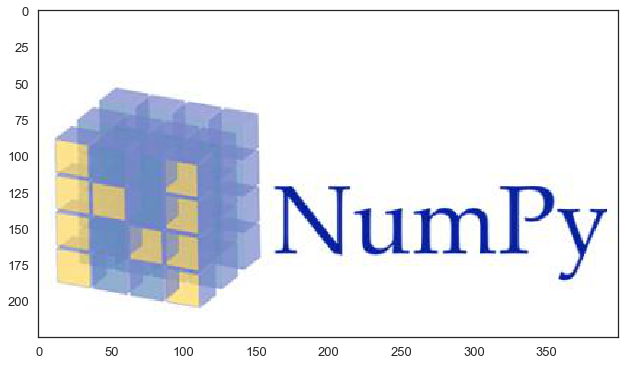

In [63]:
with sns.axes_style("white"):
    plt.imshow(image)

### What does the following expression do:

```python
image[:, :, np.arange(3) != 1] = 0
```
<br/>
<br/>
<br/>
<br/>
<br/>

---

**Solution**



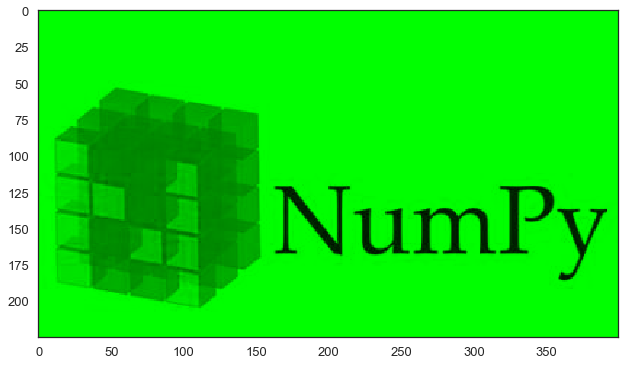

In [64]:
imageC = image.copy()
imageC[:,:,np.arange(3) != 1] = 0

with sns.axes_style("white"):
    plt.imshow(imageC)

## Comparing green and blue information

Extracting the Green and Blue information

In [65]:
green_data = np.floor(image[:,:,1]).astype(image.dtype)

blue_data = np.floor(image[:,:,2]).astype(image.dtype)


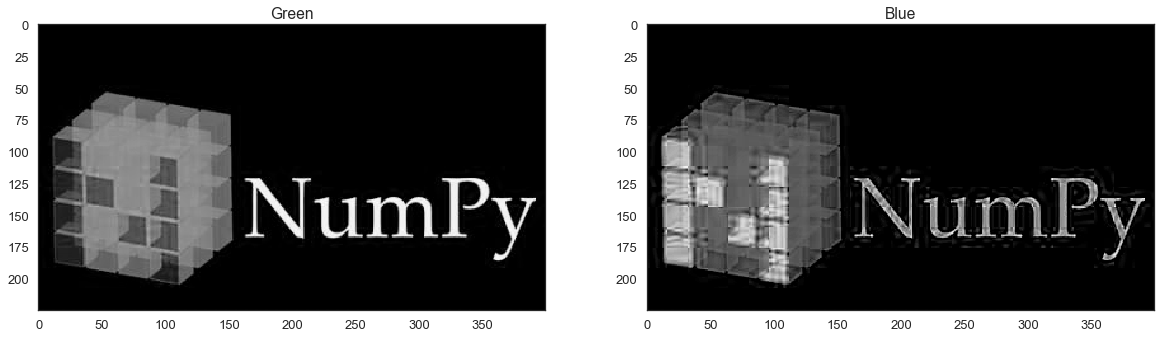

In [66]:
plt.figure(figsize=(20,10))
with sns.axes_style("white"):
    plt.subplot(1,2,1)
    plt.title("Green")
    plt.imshow(green_data)
    plt.subplot(1,2,2)
    plt.title("Blue")
    plt.imshow(blue_data)

<details>
<summary> **Question:** *Why does Blue look so bad?*</summary>

<p>
The human eye is not very sensitive to the color blue.  As a consequence jpeg compression algorithms tend to more aggressively compress the blue dimension.  
</p>

</details>

---

# Break and Switch to Slides

---

---

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>





# Pandas and the DataFrame

In [67]:
import pandas as pd

## Series

The numpy arrays we have been using contain data of a single type and the location of the data item matters.  Often when working with data the location of the data only matters in a relative sense.  

Consider the following city population data:

In [68]:
pop = np.array([10.01, 0.84, 8.41, 13.62, np.nan, 0.84, 0.01, 0.01])
city = ["Seoul", "SF", "NYC", "Tokyo", "Typo", "SF", "Mechville", "Zootopia"]

As long as the population and city stay aligned the exact ordering doesn't matter.  Furthermore, the data is really a mapping from city name to population.  We would like a data structure that couples these two relates pieces of data.

To address this need Pandas introduces the `Series` object as a fundamental representation of **column** of data of the same type.

In [69]:
pop_series = pd.Series(pop, index=city, name="Population")
pop_series

Seoul        10.01
SF            0.84
NYC           8.41
Tokyo        13.62
Typo           NaN
SF            0.84
Mechville     0.01
Zootopia      0.01
Name: Population, dtype: float64

We can lookup elements by their value

In [70]:
pop_series["Seoul"]

10.01

Notice that since `SF` occurs twice we get a series back:

In [71]:
pop_series["SF"]

SF    0.84
SF    0.84
Name: Population, dtype: float64

### Lookup by location (should be avoided, why?)

In [72]:
pop_series.iloc[1:3]

SF     0.84
NYC    8.41
Name: Population, dtype: float64

<br/><br/><br/><br/>
### Slicing with predicates

In [73]:
pop_series[pop_series > 10.]

Seoul    10.01
Tokyo    13.62
Name: Population, dtype: float64

### Important Point!
**Notice that slicing a series preserves the index and the name.**  

* This is a big improvement over numpy where the meaning of the data is lost when the location changes.

---

<br/>
<br/>
<br/>
<br/>


However if you insist you can still access the underlying numpy arrays

In [74]:
pop_series.values

array([  1.00100000e+01,   8.40000000e-01,   8.41000000e+00,
         1.36200000e+01,              nan,   8.40000000e-01,
         1.00000000e-02,   1.00000000e-02])

In [75]:
pop_series.index

Index(['Seoul', 'SF', 'NYC', 'Tokyo', 'Typo', 'SF', 'Mechville', 'Zootopia'], dtype='object')

### We can apply mathematical operations to the series:

In [76]:
np.log(pop_series + 1.0)

Seoul        2.398804
SF           0.609766
NYC          2.241773
Tokyo        2.682390
Typo              NaN
SF           0.609766
Mechville    0.009950
Zootopia     0.009950
Name: Population, dtype: float64


#### Again notice that the row index is maintained

---






<br/>
<br/>
<br/>
<br/>
<br/>



## Cleaning data in a Series

In [77]:
pop_series.notnull()

Seoul         True
SF            True
NYC           True
Tokyo         True
Typo         False
SF            True
Mechville     True
Zootopia      True
Name: Population, dtype: bool

In [78]:
pop_series.dropna()

Seoul        10.01
SF            0.84
NYC           8.41
Tokyo        13.62
SF            0.84
Mechville     0.01
Zootopia      0.01
Name: Population, dtype: float64

In [79]:
pop_series.drop_duplicates()

Seoul        10.01
SF            0.84
NYC           8.41
Tokyo        13.62
Typo           NaN
Mechville     0.01
Name: Population, dtype: float64

### Note that drop duplicates is by value not by key

In [80]:
pop_series[ ~pop_series.index.duplicated(keep="first") ]

Seoul        10.01
SF            0.84
NYC           8.41
Tokyo        13.62
Typo           NaN
Mechville     0.01
Zootopia      0.01
Name: Population, dtype: float64

Perhaps a more clear way to removed duplicates using `groupby()` which we will return to soon

In [81]:
pop_series.groupby(pop_series.index).first()

Mechville     0.01
NYC           8.41
SF            0.84
Seoul        10.01
Tokyo        13.62
Typo           NaN
Zootopia      0.01
Name: Population, dtype: float64

Cleaning data in one shot:

In [82]:
pop_series_clean = (pop_series
    .groupby(pop_series.index).first()
    .dropna()
)
pop_series_clean

Mechville     0.01
NYC           8.41
SF            0.84
Seoul        10.01
Tokyo        13.62
Zootopia      0.01
Name: Population, dtype: float64

---

<br/>
<br/>
<br/>
<br/>

### Ordering Data

In [83]:
pop_series_clean.sort_values(ascending=False)

Tokyo        13.62
Seoul        10.01
NYC           8.41
SF            0.84
Zootopia      0.01
Mechville     0.01
Name: Population, dtype: float64

In [84]:
pop_series_clean.sort_index()

Mechville     0.01
NYC           8.41
SF            0.84
Seoul        10.01
Tokyo        13.62
Zootopia      0.01
Name: Population, dtype: float64

---

<br/>
<br/>
<br/>
<br/>

## Summarizing Series

Examining a few elements

In [85]:
pop_series_clean.head(n=3)

Mechville    0.01
NYC          8.41
SF           0.84
Name: Population, dtype: float64

Computing statistics

In [86]:
pop_series_clean.describe()

count     6.000000
mean      5.483333
std       5.945363
min       0.010000
25%       0.217500
50%       4.625000
75%       9.610000
max      13.620000
Name: Population, dtype: float64

Notice that even the summary is also a `Series`

--- 

<br/>
<br/>
<br/>

## Basic Visualization

Pandas supports a range of [plots](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) which can be directly applied to a series. To learn more checkout this [extended tutorial](http://pandas.pydata.org/pandas-docs/stable/visualization.html) on pandas visualization.

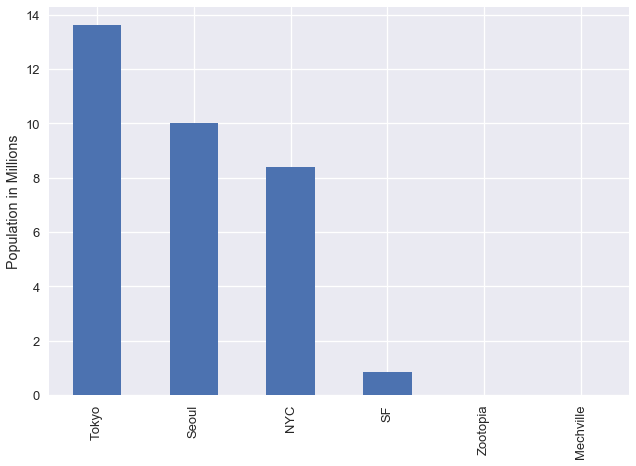

In [87]:
(pop_series_clean
     .sort_values(ascending=False)
     .plot.bar()
)

plt.ylabel('Population in Millions')

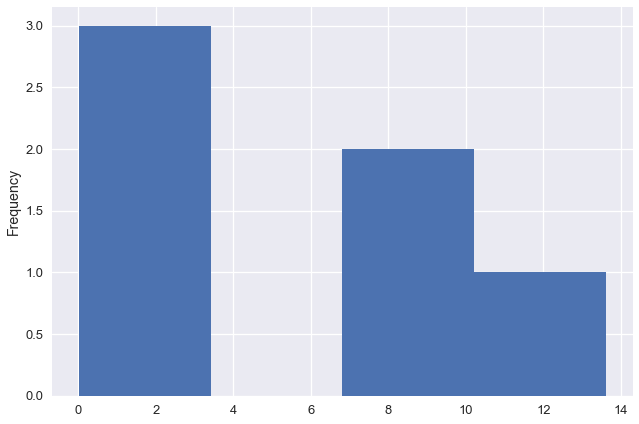

In [88]:
pop_series_clean.plot.hist(bins=4)

---

<br/><br/><br/><br/>

# Special series operations (Strings)


In [89]:
text_series = pd.Series(["1,one", "2,two", "3,three", "4,four"], 
                        name="Numbers")
text_series

0      1,one
1      2,two
2    3,three
3     4,four
Name: Numbers, dtype: object

### Questions?
1. What is the index of this series?
1. How could I split the numbers into separate series?

<br/><br/><br/><br/><br/>
There is a collection of routines associated with each series:

    1. series.str.split()
    2. series.str.len()
    3. series.str.strip()
    
You will use these often so [learn about them](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary). 


In [90]:
text_series.str.split(pat=",", expand=True)

,0,1
0,1,one
1,2,two
2,3,three
3,4,four


---

<br/><br/><br/><br/><br/>

# Special Series operations (Dates and Times)

Consider the following string data for the three lectures Prof. Gonzalez taught (so far...)

In [91]:
date_strings = pd.Series(["01/17/2017", "01/19/2017", "02/07/2017"], 
                         index=["lec1", "lec2", "lec7"], name="Dates")
date_strings

lec1    01/17/2017
lec2    01/19/2017
lec7    02/07/2017
Name: Dates, dtype: object

We can use the Pandas built-in date-time parsing facilities [`pd.to_datetime`](http://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.to_datetime.html) to convert the strings into date objects:

In [92]:
dates = pd.to_datetime(date_strings)
dates

lec1   2017-01-17
lec2   2017-01-19
lec7   2017-02-07
Name: Dates, dtype: datetime64[ns]

Then use one of the many date time series operations defined [here](http://pandas.pydata.org/pandas-docs/version/0.19.2/api.html#datetimelike-properties).

In [93]:
dates.dt.dayofweek

lec1    1
lec2    3
lec7    1
Name: Dates, dtype: int64

Many of the visualizations are pretty basic but can be useful as you are quickly exploring data.

---

<br/>
<br/>
<br/>
<br/>


# Data Frames

DataFrames are a programming abstraction for Tables that provide a lot of the syntactic functionality we found useful when working with matrices.

Conceptually a DataFrame is a collection of series (_columns_) with a common index.  Let's work through some basic examples.

### Making a DataFrame

In [94]:
import pandas as pd

We can make a DataFrame from a dictionary:

In [95]:
baby_names_dictionary = {
    "Name": ["Emma", "Liam", "Noah", "Olivia",  "Sophia"],
    "Sex": ["F", "M", "M", "F", "F"],
    "Count": [20355, 18281, 19511, 19553, 17327]
}
baby_names_dictionary

{'Count': [20355, 18281, 19511, 19553, 17327],
 'Name': ['Emma', 'Liam', 'Noah', 'Olivia', 'Sophia'],
 'Sex': ['F', 'M', 'M', 'F', 'F']}

In [96]:
baby_names = pd.DataFrame(baby_names_dictionary)
baby_names

,Count,Name,Sex
0,20355,Emma,F
1,18281,Liam,M
2,19511,Noah,M
3,19553,Olivia,F
4,17327,Sophia,F


<details>
<summary>Does the order of columns matter?</summary>
Conceptually no.  However we have to be a little careful since Pandas allows us to index columns by their location (avoid doing this).
</details>

<details>
<summary>Does the order of row matter?</summary>
Conceptually no.  However we have to be a little careful since Pandas allows us to index rows by their location (avoid doing this).
</details>

## Accessing each column (`Series`)

In [97]:
baby_names['Name']

0      Emma
1      Liam
2      Noah
3    Olivia
4    Sophia
Name: Name, dtype: object

In [98]:
baby_names[['Name', 'Sex']]

,Name,Sex
0,Emma,F
1,Liam,M
2,Noah,M
3,Olivia,F
4,Sophia,F


<br/>
<br/>
<br/>

## Default Index?

What is the default index?  

In [99]:
baby_names.index

RangeIndex(start=0, stop=5, step=1)

Since we never specified the index, a default index was created which numbers each of the rows.  We can access each row using this default index:

In [100]:
baby_names.loc[[1,3]]

,Count,Name,Sex
1,18281,Liam,M
3,19553,Olivia,F


<br/>
<br/>
<br/>

## Setting an Index

In [101]:
baby_names = baby_names.set_index(['Name', 'Sex'])
baby_names

,,Count
Name,Sex,
Emma,F,20355
Liam,M,18281
Noah,M,19511
Olivia,F,19553
Sophia,F,17327


In [102]:
baby_names.loc[[("Liam", "M"), ("Noah", "M")]]

,,Count
Name,Sex,
Liam,M,18281
Noah,M,19511


---

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# More Advanced Pandas

We can download baby names collected by the social security office.

```python
%%bash
wget https://www.ssa.gov/oact/babynames/state/namesbystate.zip
unzip namesbystate.zip
```

In [103]:
!ls *.TXT

AK.TXT CO.TXT GA.TXT IN.TXT MD.TXT MS.TXT NH.TXT OH.TXT SC.TXT VA.TXT WY.TXT
AL.TXT CT.TXT HI.TXT KS.TXT ME.TXT MT.TXT NJ.TXT OK.TXT SD.TXT VT.TXT
AR.TXT DC.TXT IA.TXT KY.TXT MI.TXT NC.TXT NM.TXT OR.TXT TN.TXT WA.TXT
AZ.TXT DE.TXT ID.TXT LA.TXT MN.TXT ND.TXT NV.TXT PA.TXT TX.TXT WI.TXT
CA.TXT FL.TXT IL.TXT MA.TXT MO.TXT NE.TXT NY.TXT RI.TXT UT.TXT WV.TXT


In [104]:
!head CA.TXT

<details>
<summary>**Data cleaning question:** _What is the format of this file?_</summary>
Comma separated values (CSV)
</details>

In [105]:
baby_names = pd.read_csv("CA.TXT")
baby_names.head()

,CA,F,1910,Mary,295
0,CA,F,1910,Helen,239
1,CA,F,1910,Dorothy,220
2,CA,F,1910,Margaret,163
3,CA,F,1910,Frances,134
4,CA,F,1910,Ruth,128


<details>
<summary>What went wrong?</summary>
No header provided in the file so first record was treated as a header.
</details>

---

In [106]:
column_names = ["State", "Sex", "Year", "Name", "Count"]
baby_names = pd.read_csv("CA.TXT", names = column_names)
baby_names.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


Looks Good!

For fun let's load the rest of the states (why might we not want to do this?):

In [107]:
import os

file_names = (f for f in os.listdir() if f.endswith(".TXT"))

baby_names = pd.concat(
    (pd.read_csv(f, names = column_names) for f in file_names)
).reset_index(drop=True)

In [108]:
baby_names.head()

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


How much data do we have?

In [109]:
len(baby_names)

5743017

How many total people are counted?

In [110]:
baby_names['Count'].sum()

302037244

<details>
<summary>**Question:** *Is this number reasonable?*</summary>
It seems low.  However this is what the social security website states: 
<quote>
All names are from Social Security card applications for births that occurred in the United States after 1879. Note that many people born before 1937 never applied for a Social Security card, so their names are not included in our data. For others who did apply, our records may not show the place of birth, and again their names are not included in our data. All data are from a 100% sample of our records on Social Security card applications as of the end of February 2016.
</quote>

<p>
There are additional qualifications [here](https://www.ssa.gov/oact/babynames/background.html)
</p>

<p>
To get a better understanding of how people enrolled in social security you can plot the number of applicants per year.
</p>
<code>
baby_names.groupby("Year")['Count'].sum().plot()
</code>
</details>

We will explain the following query in a few minutes but let's quickly take a look at the date distribution of the data.

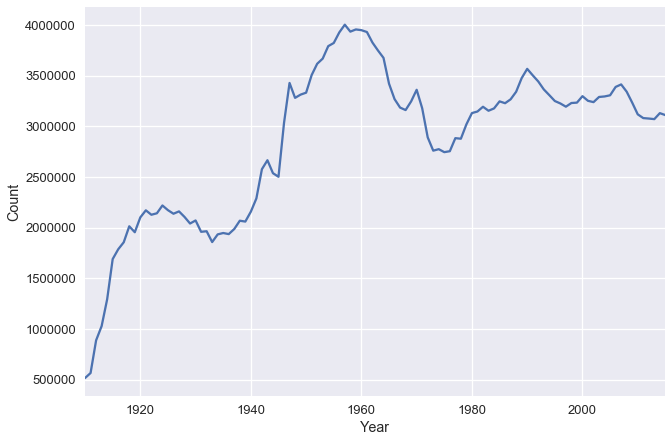

In [111]:
baby_names.groupby("Year")['Count'].sum().plot()
plt.ylabel('Count')

---

<br/>
<br/>
## Adding Derived Columns

You can add derived columns by simply assigning to the DataFrame

In [112]:
baby_names['Len'] = baby_names['Name'].str.len()
baby_names.head()

,State,Sex,Year,Name,Count,Len
0,AK,F,1910,Mary,14,4
1,AK,F,1910,Annie,12,5
2,AK,F,1910,Anna,10,4
3,AK,F,1910,Margaret,8,8
4,AK,F,1910,Helen,7,5


Notice the `.str.len()` above?  There is a [large collection of string operations](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) you can apply to series containing strings. 

### Computing the last letter

In [113]:
baby_names['Last Letter'] = baby_names['Name'].str[-1].str.lower()
baby_names.head()

,State,Sex,Year,Name,Count,Len,Last Letter
0,AK,F,1910,Mary,14,4,y
1,AK,F,1910,Annie,12,5,e
2,AK,F,1910,Anna,10,4,a
3,AK,F,1910,Margaret,8,8,t
4,AK,F,1910,Helen,7,5,n


---

<br/>
<br/>
<br/>
<br/>

# More Advanced Slicing

### Zoom in on the data for California in 2015.  

In [114]:
ca2015 = baby_names[
    (baby_names['Year'] == 2015) & 
    (baby_names['State'] == "CA")
]
          
len(ca2015)

6836

In [115]:
ca2015.head()

,State,Sex,Year,Name,Count,Len,Last Letter
571368,CA,F,2015,Sophia,2942,6,a
571369,CA,F,2015,Mia,2850,3,a
571370,CA,F,2015,Emma,2706,4,a
571371,CA,F,2015,Olivia,2507,6,a
571372,CA,F,2015,Isabella,2388,8,a


* **Notice that we retained the index from the original table.**

### How popular is the name Joey this year?

In [116]:
ca2015[ca2015["Name"] == "Joey"]

,State,Sex,Year,Name,Count,Len,Last Letter
572582,CA,F,2015,Joey,24,4,y
720491,CA,M,2015,Joey,80,4,y


---

<br/>
<br/>
<br/>
<br/>
<br/>

# Grouping

We will often want to compute data at a more coarse granularity by aggregating over all records that share a common set of attributes.  This process is called grouping.  In the following we will explore a few grouping operations.  To get an intuition behind grouping consider the following figure:

![Split apply combine](https://www.safaribooksonline.com/library/view/learning-pandas/9781783985128/graphics/5128OS_09_01.jpg)



## Compute the total number of males and females

1. How should I split the data?
1. *Aggregation function*?
1. What will my final table look like?

<br/><br/><br/><br/><br/>

---

#### Answer:

In [117]:
gender_counts = baby_names.groupby("Sex")[["Count"]].sum()
gender_counts.head()

,Count
Sex,
F,145235866
M,156801378


Notice that the `groupby` operations produces a table that is indexed (keyed) by the group attribute (in this case `Sex`).

### What are the most common names of all time?

1. How should I split the data?
1. How should I aggregate each group?
1. What will my table look like?

<br/><br/><br/><br/><br/>

---

#### Answer


In [118]:
name_counts = baby_names.groupby('Name')[['Count']].sum()
name_counts.head()

,Count
Name,
Aaban,12
Aadan,23
Aadarsh,5
Aaden,3675
Aadhav,20


Visualizing the most popular names

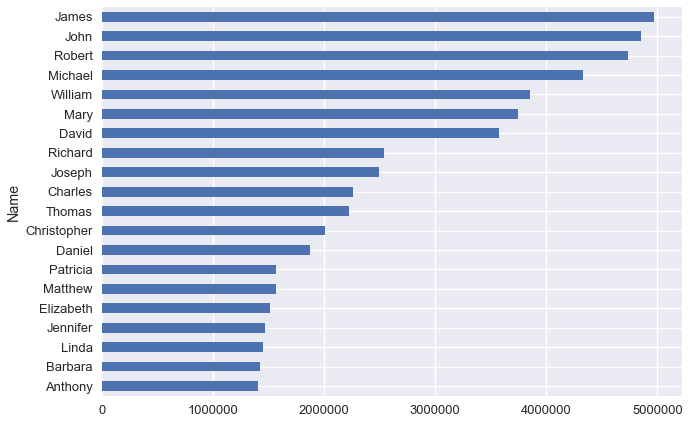

In [119]:
(
name_counts['Count']
    .sort_values(ascending=False)
    .head(20)
    .sort_values()
    .plot.barh()
)

## Break popular names down by gender

1. How should I split the data?
1. How should I aggregate each group?
1. What will my table look like?

<br/><br/><br/><br/><br/>

---

#### Answer

(0, 4954037)

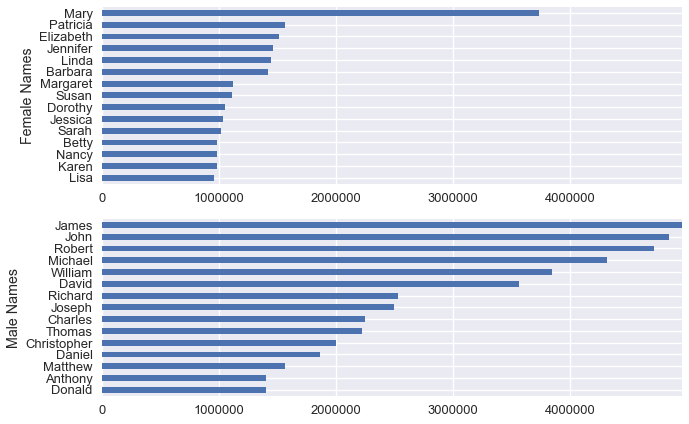

In [120]:
name_counts = baby_names.groupby(['Sex','Name'])['Count'].sum()

plt.subplot(2,1,1)
(name_counts
     .loc['F']
     .sort_values(ascending=False)
     .head(15)
     .sort_values()
     .plot.barh()
)
plt.ylabel('Female Names')
plt.xlim(0, name_counts.max())
plt.subplot(2,1,2)
(name_counts
     .loc['M']
     .sort_values(ascending=False)
     .head(15)
     .sort_values()
     .plot.barh()
)
plt.ylabel('Male Names')
plt.xlim(0, name_counts.max())

<details>
<summary>**Question:** What is going on here?</summary>
<p>
Males seem to be concentrated around Judeo-Christian names while females appear to be more diverse.
</p>
</details>

## How many unique names are there for men and women?

1. How should I split the data?
1. How should I aggregate each group?
1. What will my table look like?

<br/><br/><br/><br/><br/>

---

#### Answer

In [121]:
unique_names = baby_names.groupby('Sex')['Name'].nunique()

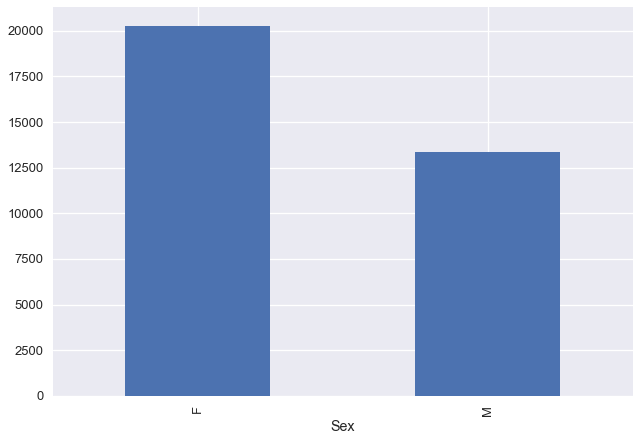

In [122]:
unique_names.plot.bar()

---

<br/><br/><br/><br/><br/>

# What names are most gender neutral?

1. What does it mean for a name to be "gender neutral"?
1. What computation would I run to compute this value?

---

#### Proposals: 

1. For each name compute $|C_M - C_F|$
2. For each name compute $(C_M + C_F)/2$
3. For each name compute $\sqrt{C_M * C_F}$


---

I will focus on more recent dates:

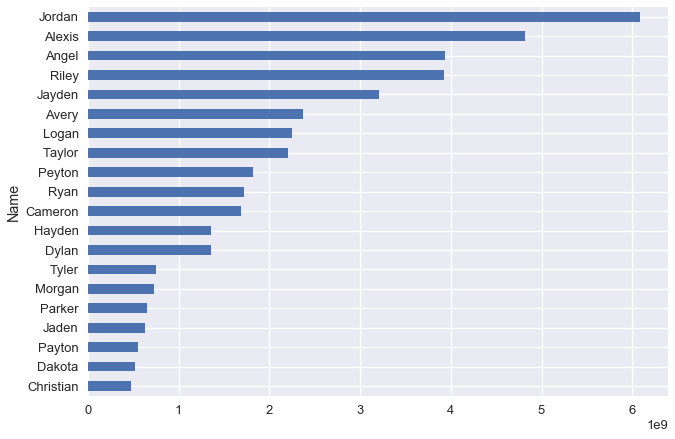

In [123]:
(baby_names[baby_names['Year'] > 2000]
     .groupby(['Name', 'Sex'])['Count'].sum()
     .groupby(level ='Name').prod()
     .sort_values(ascending=False)
     .head(20)
     .sort_values()
     .plot.barh()
)

Notice in the above example it was necessary to use the `level` argument for the second `groupby` call.  This is because the `Name` column became an index after the first `groupby`.  If we wanted to avoid this we could do the following:

```python
(baby_names[baby_names['Year'] > 2000]
     .groupby(['Name', 'Sex'], as_index=False)['Count'].sum()
     .groupby('Name').prod()
     .sort_values('Count', ascending=False)
     .head(20)
     .sort_values('Count')
     .plot.barh()
)
```

#### Which instructor has the most popular name?

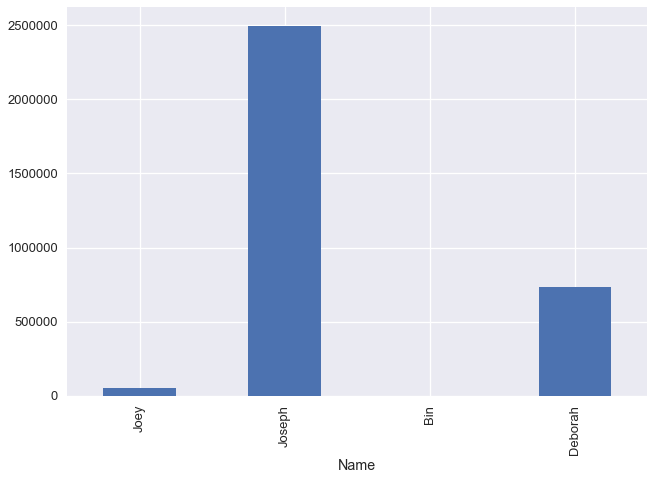

In [124]:
(baby_names.groupby("Name")['Count'].sum()
     .loc[["Joey", "Joseph", "Bin", "Deborah"]]
     .plot.bar()
)

---

<br/><br/><br/><br/><br/><br/>

# Pivoting

Supposed we wanted to study the breakdown with respect to the last letter in the names. We might like a table that looks like:

|   	| "M"  	| "F"  	|
|---	|---	|---	|
| "a"  	|  48576568 | 1560980  	|
| "b"  	|  9286 	| 1343336  	|
| "c"  	|  17077 	| 1545079  	|

We can build such a table by Pivoting.  Pivoting will take the unique values in a column (e.g., `Sex`: {`M`, `F`}) and make those into separate columns.  Then we can choose a column (or set of columns) to `groupby` (e.g., `Last Letter` : {`a`, `b`, ...}) and finally a column for which we want to compute the total (e.g., `Count`).  In essence pivoting is just like `groupby` except we can choose two dimension along which to group.


In [125]:
last_letter_pivot = baby_names.pivot_table(
    index=['Last Letter'], # the row index
    columns=['Sex'], # the column values
    values='Count', # the field(s) to processed in each group
    aggfunc='sum', # group operation
    margins=True # show margins `All`
)
last_letter_pivot

Sex,F,M,All
Last Letter,,,
a,48576568.0,1560980.0,50137548.0
b,9286.0,1343336.0,1352622.0
c,17077.0,1545079.0,1562156.0
d,562936.0,15387928.0,15950864.0
e,30938194.0,12672282.0,43610476.0
f,452.0,153419.0,153871.0
g,12683.0,516521.0,529204.0
h,6941294.0,6362319.0,13303613.0
i,2931172.0,568135.0,3499307.0


We can use the built-in plotting functionality in Pandas to visualize this data quickly:

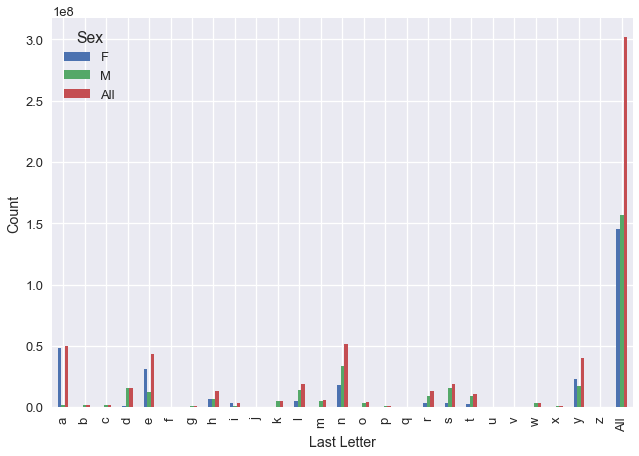

In [126]:
(
    last_letter_pivot
    .plot.bar()
)
plt.ylabel("Count")

## This plot is flawed.  Why?
<br/><br/><br/><br/><br/>

---
#### Answer:
* We don't want the marginals (All) in the plot
* We are looking at counts and we might be interested in proportions?
* We sorted by letter making it hard to compare various lines?

In [127]:
last_letter_pivot = baby_names.pivot_table(
    index=['Last Letter'], # the row index
    columns=['Sex'], # the column values
    values='Count', # the field(s) to processed in each group
    aggfunc='sum', # group operation
    margins=False # show margins `All`
)
last_letter_pivot

Sex,F,M
Last Letter,,
a,48576568,1560980
b,9286,1343336
c,17077,1545079
d,562936,15387928
e,30938194,12672282
f,452,153419
g,12683,516521
h,6941294,6362319
i,2931172,568135


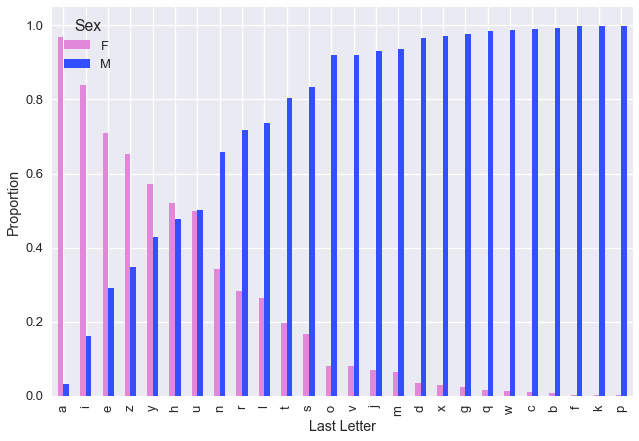

In [128]:
# normalize the counts 
normalized_ll_pivot = (
    last_letter_pivot.div(last_letter_pivot.sum(axis=1), axis=0)
)


pink_blue = ["#E188DB", "#334FFF"]
with sns.color_palette(sns.color_palette(pink_blue)):
    (normalized_ll_pivot
         .sort_values("F",ascending=False) # Sort the plot
         .plot.bar()
    )
    plt.ylabel('Proportion')

<details>
<summary> **Question:** *How might you use this information to predict `Sex` from name?*</summary>
There are certain letters that appear to be disproportionately associated with the `Sex` of the baby.
</details>

<br/><br/><br/><br/><br/><br/>

---


## More advanced Pivoting and Grouping

Suppose I wanted to compute a pivot table which looked like:

```
Name  Andrew     Sam
Year                
1910   845.0   847.0
1911  1066.0   895.0
1912  1922.0  1295.0
1913  2204.0  1518.0
1914  2957.0  1856.0
...
```

containing **the total number of babies** each year with a given name.

Let's fill in the following query

```python
(
baby_names
     .pivot_table(
         index = ???, 
         columns = ???, 
         values = ???, 
         aggfunc = ???)
     .loc[:, ['Andrew', 'Sam']].head()
)
```
<br/><br/><br/><br/><br/>

---
#### Answer

Suppose we want to track the popularity of the Staff names over time?

In [129]:
staff = ["Andrew", "Sam", "Bin", "Deborah", "Joseph", "Joey"]

In [130]:
(baby_names
     .pivot_table(index=['Year'], columns=['Name'], values='Count', aggfunc='sum')
     .loc[:, staff].head()
)

Name,Andrew,Sam,Bin,Deborah,Joseph,Joey
Year,,,,,,
1910,845.0,847.0,NaN,11.0,5226.0,NaN
1911,1066.0,895.0,NaN,12.0,6492.0,NaN
1912,1922.0,1295.0,NaN,NaN,12070.0,NaN
1913,2204.0,1518.0,NaN,6.0,14467.0,NaN
1914,2957.0,1856.0,NaN,34.0,18858.0,NaN


Some names don't occur on some years. What should I do about the `NaN` values?
<br/>
<br/>
<br/>

In [131]:
staff_pivot = (
    baby_names
    .pivot_table( # we could also set fill_value=0.0
        index=['Year'], columns=['Name'], values='Count', aggfunc='sum')
    .loc[:,staff]
    ## Replace the NaN Values with 0.0
    .fillna(0.0)
)
staff_pivot.head()

Name,Andrew,Sam,Bin,Deborah,Joseph,Joey
Year,,,,,,
1910,845.0,847.0,0.0,11.0,5226.0,0.0
1911,1066.0,895.0,0.0,12.0,6492.0,0.0
1912,1922.0,1295.0,0.0,0.0,12070.0,0.0
1913,2204.0,1518.0,0.0,6.0,14467.0,0.0
1914,2957.0,1856.0,0.0,34.0,18858.0,0.0


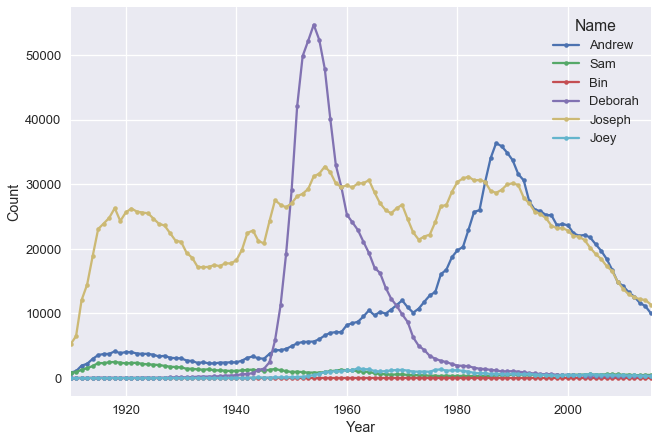

In [132]:
staff_pivot.plot(marker='.')
plt.ylabel("Count")

What if we wanted to compute the proportion relative to the total names reported that year?

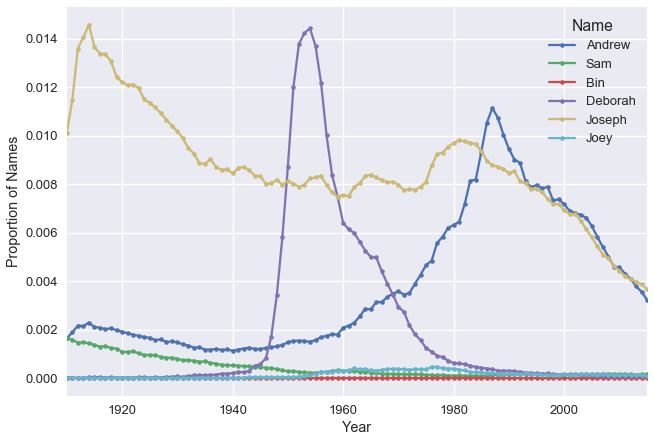

In [133]:
yearly_total = baby_names.groupby('Year')['Count'].sum()

# use the apply function to divide each year by the yearly total
(
    staff_pivot
        .div(yearly_total, axis=0)
        .plot(marker='.')
)
plt.ylabel("Proportion of Names")

### What does this plot tell us?
<br/><br/><br/><br/><br/>

---

# Joining

### Comparing popularity across two time periods

Suppose I want to compare the popularity of names from the 80s with names after 2K.  Let's look at one way to accomplish this comparison using joins.

1. Compute the total counts of each name during the 80s and >2K 
2. Join these names back together to get a table that looks like:

```
      Count80s  Count2ks
Name                       
Aakash        5.0     179.0
Aaliyah      36.0   64972.0
Aarika       44.0      14.0
Aarin         5.0      41.0
Aaron    139165.0  121726.0
```

## Build groups

In [134]:
name80s = (
    baby_names[(baby_names['Year'] >= 1980) & (baby_names['Year'] < 1990)]
        .groupby("Name", as_index=False)[['Count']].sum()
)

name80s.head()

,Name,Count
0,Aakash,5
1,Aaliyah,36
2,Aarika,44
3,Aarin,5
4,Aaron,139165


In [135]:
name2ks = (
    baby_names[baby_names['Year'] >= 2000]
        .groupby("Name", as_index=False)[['Count']].sum()
)

name2ks.head()

,Name,Count
0,Aaban,12
1,Aadan,23
2,Aadarsh,5
3,Aaden,3675
4,Aadhav,20


## Join tables (columns) together

In [136]:
joined_names = name80s.merge(name2ks, 
                             on="Name", # What column to use when matching rows
                             suffixes=("_80s", "_2ks"))
joined_names.head()

,Name,Count_80s,Count_2ks
0,Aakash,5,185
1,Aaliyah,36,66437
2,Aarika,44,14
3,Aarin,5,41
4,Aaron,139165,131277


### How many rows did I get?

How many rows are in my input

In [137]:
print("80s Names:", len(name80s))
print("2Ks Names:", len(name2ks))

80s Names: 11365
2Ks Names: 19510


<br/>
<br/>
<br/>
<br/>
<br/>

### Answer:


In [138]:
print("Joined Names:", len(joined_names))

Joined Names: 7786


#### What happened? 

We only obtained rows that had a name in both tables.  This is because the default join behavior is what is called an `inner` join.  We will study different kinds of joins in much more detail next week.  However for our purposes here we will want an `outer` join:

In [139]:
joined_names = name80s.merge(name2ks, 
                             how="outer", # Include rows from both tables with missing values as NaN
                             on="Name", 
                             suffixes=("_80s", "_2ks"))
joined_names = joined_names.set_index("Name")
joined_names.head(10)

,Count_80s,Count_2ks
Name,,
Aakash,5.0,185.0
Aaliyah,36.0,66437.0
Aarika,44.0,14.0
Aarin,5.0,41.0
Aaron,139165.0,131277.0
Aarron,44.0,6.0
Aarti,22.0,NaN
Aaryn,6.0,109.0
Abagail,5.0,3117.0


Notice now that we have more rows than before:
```
80s Names: 11365
2Ks Names: 19510
Inner Join: 7786
```

In [140]:
len(joined_names)

23089

### Fun Visualization [Skip code in class]

Read the code at home.

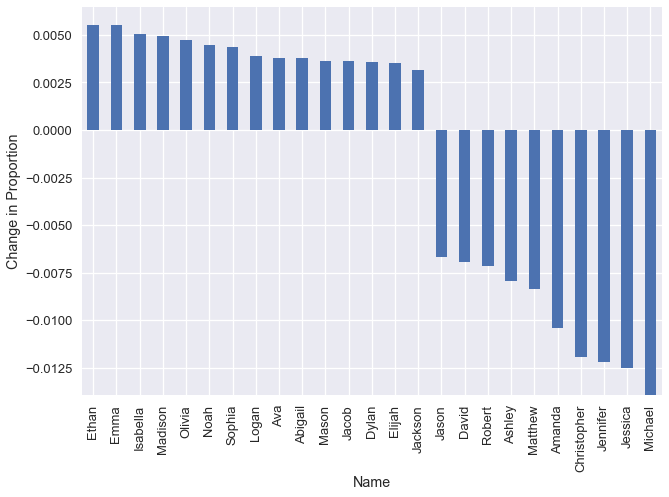

In [141]:
# compute the relative popularity of the name in that period
normalized = joined_names.div(joined_names.sum(axis=0), axis=1)

# Compute the change in popularity
deltaprop = normalized['Count_2ks'] - normalized['Count_80s']

pd.concat([
    deltaprop.sort_values(ascending=False).head(15),
    deltaprop.sort_values().head(10).sort_values(ascending=False)]
    ).plot.bar()

plt.ylabel("Change in Proportion")

<br/><br/><br/><br/><br/><br/>

---

# Switch back to slides.

---

<br/><br/><br/><br/><br/><br/>

# Visualization with Seaborn and Matplotlib

So far we already made some plots using:
  * the [Pandas built-in plotting tools](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) that call 
  * the [Matplotlib](http://matplotlib.org/api/pyplot_api.html) python plotting library
  
Some important things to note from MatplotLib:

```python
import matplotlib.pyplot as plt

plt.xlabel("The x-axis (horizontal) label value")
plt.xlabel("The y-axis (vertical) label value")
plt.title("The title of the plot")
plt.axvline(x=1.42, ymin=0, ymax=3.14, linewidth=2, color='r')
plt.legend(["Line1", "Line2"])
plt.savefig("amazing_plot.pdf") 
```

Mastering all of matplotlib is **difficult**.  I routinely have to lookup basic operations.  Fortunately, there are plenty of forums and tutorial on using matplotlib. 

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Seaborn

Seaborn can the thought of as a wrapper over Matplotlib which:

* Makes standard plots **more visually appealing** using color and design
* Automates certain complex statistical visualizations


In [142]:
import seaborn as sns
# There is a bug in stats model ...
import warnings
warnings.filterwarnings('ignore',module="statsmodels")


---
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Visualizing Distributions

The [`distplot`](http://seaborn.pydata.org/tutorial/distributions.html#histograms) is an enhanced histogram which on top of the histogram overlays:
* **kernel density estimates** and other models in **statsmodel** library
* **rug plots** 
* **estimates linear models** for the data




Make some fake data

In [143]:
x = pd.Series(
    np.hstack([np.random.normal(size=100), 2.5 + 0.5 * np.random.normal(size=100)]),
    name="Random Data"
)
x.head()

0    0.915911
1   -0.313496
2   -0.322231
3   -0.349650
4    1.583566
Name: Random Data, dtype: float64

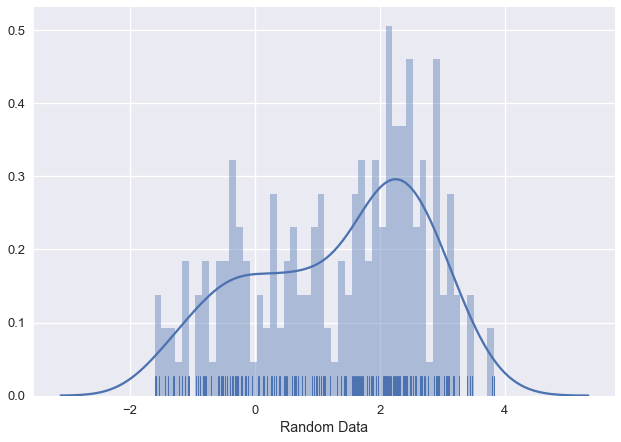

In [144]:
sns.distplot(x, bins=50, rug=True)

### Observe
1. Subtle background histogram
1. Rug plot at bottom
1. Kernel density estimator (smoothed approximation to histogram)
1. x-label automatically pulled from Series Name

<br/><br/><br/><br/><br/>

---

### Plotting Joint distributions with Joint plot

Often we will want to plot two related variables to understand their joint density. Seaborn provides utilities to

1. simultaneously visualize the margin and **joint distributions**
1. compute various **joint density estimators**

Here we generate some synthetic data

In [145]:
mean, cov = np.ones(2), np.array([(1, .5), (.5, 1)])
data = np.vstack([
    np.random.multivariate_normal(mean, cov, 700),
    np.random.multivariate_normal(-2.0 * mean, 0.5 * np.eye(2), 500)])
df = pd.DataFrame(data, columns=["x", "y"])

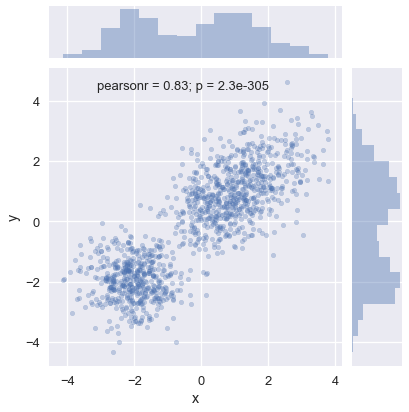

In [146]:
sns.jointplot(x="x", # x dimension column name
              y="y", # y dimension column name
              data=df, # dataframe
              marker='.', # type of marker to use
              joint_kws={'alpha':0.3} # additional plotting characteristics
             )

We can apply various density estimators:

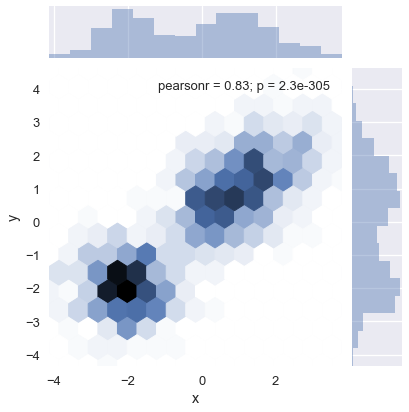

In [147]:
sns.jointplot(x="x", y="y", data=df, kind='hex')

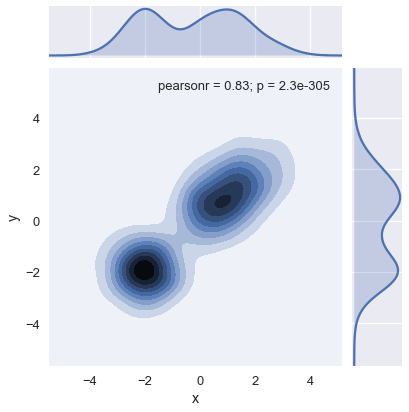

In [148]:
sns.jointplot(x="x", y="y", data=df, kind='kde')

---
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Plotting Linear Relationships

The [`lmplot`](http://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot) and related `regplot` provide visualizations for linear relationships.  In addition to constructing scatter plots `lmplot` also automatically:
* **estimates linear models** for the data
* computes **Bootstrap confidence intervals** for the linear model
* simplifies plotting additional dimensions by **color** and **subplots**
* computes **per dimension** density estimates

Loading a data collected by a waiter reporting tips and characteristics of the customer who paid.



In [149]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We can `lmplot` to plot linear relationships

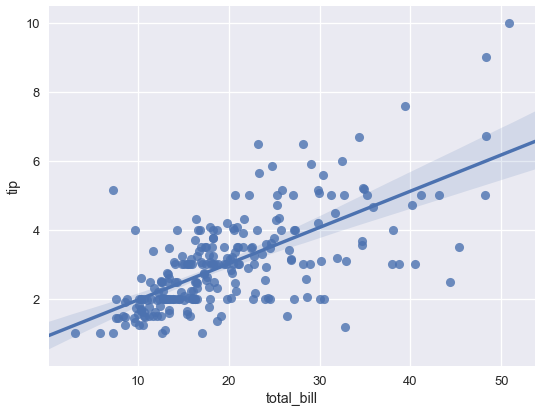

In [150]:
sns.lmplot(data=tips, x="total_bill", y="tip", size=6, aspect=1.3)

### Linear Model + CI

Notice that the plotting library automatically computes a linear estimator and even runs the Bootstrap algorithm to estimate the confidence interval of the linear model. 

<br/><br/><br/><br/><br/>

---


## We can add additional dimensions

In the following we segment (i.e., `Groupby`) the smoker dimension to create a sequence of lines, one for each value, in the grouping dimension (in this case Smoker = Yes/No).  This is done by associating the `Smoker` column with the `hue` graphic property.

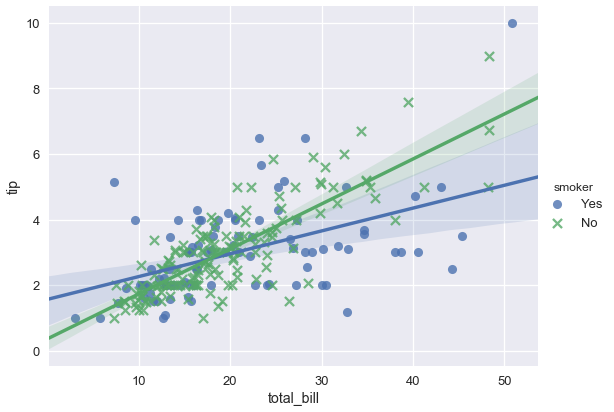

In [151]:
sns.lmplot(data=tips, x="total_bill", y="tip", # Data configuration
           hue='smoker', # Associate color with Smoker column
           markers=["o", "x"], # Define the Marker type
           size=6, aspect=1.3) # extra plot size information

This suggests that non-smokers are better tipper

# Adding another dimension (Day)

Plotting too many plots in the same figure can be difficult to read.

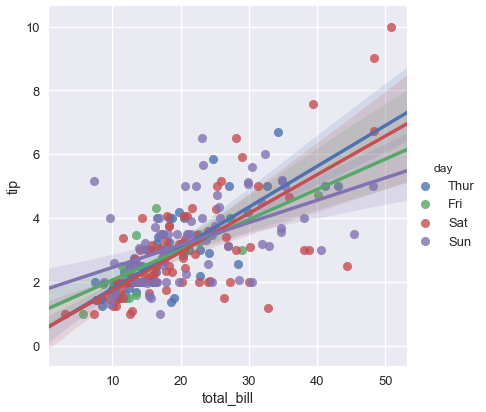

In [152]:
sns.lmplot(data=tips, x="total_bill", y="tip", 
           hue='day',
           size=6)

Alternatively we can segment the plot by setting the `col` equal to `"day"`.

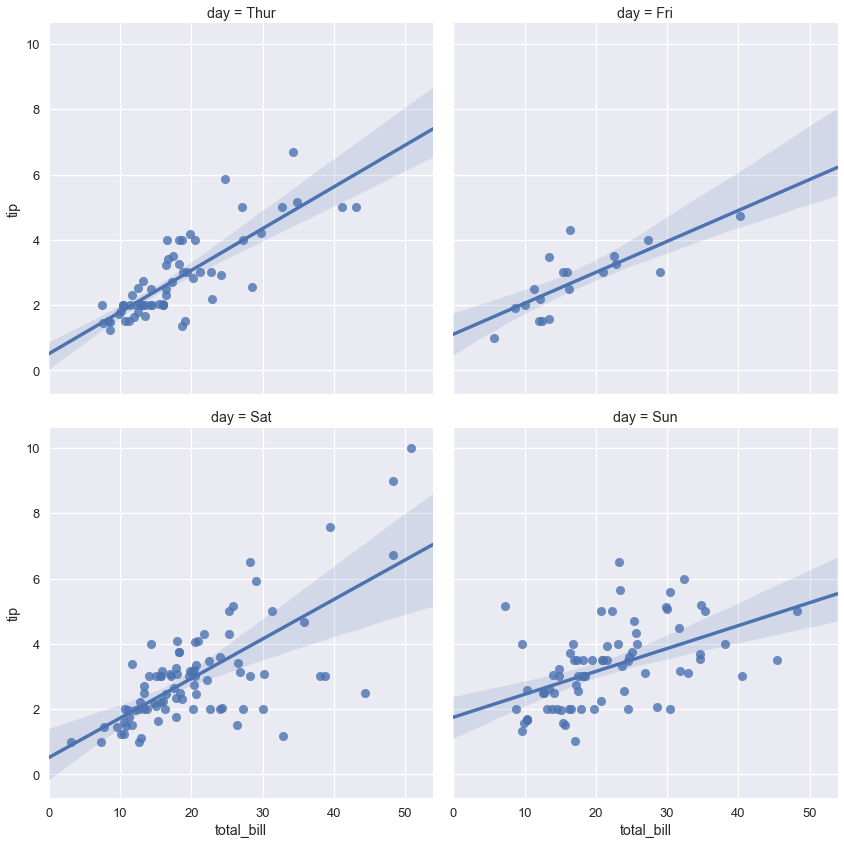

In [153]:
sns.lmplot(data=tips, x="total_bill", y="tip", 
           col='day', 
           col_wrap=2, 
           size=6)

We can also ask the joint plot to compute a regression model.  

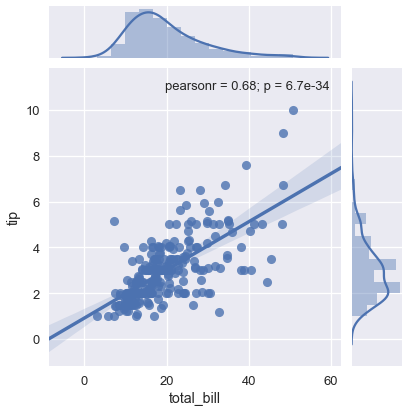

In [154]:
sns.jointplot(x="total_bill", y="tip", data=tips, 
              kind="reg", # Set the figure size
              size=6)

# boxplot

Seaborn renders boxplots using the same `hue` arguments as before.  

Here we examine the relative tip proportion broken down by day of the week and sex.

In [155]:
# compute an addition column corresponding to the trip proportion
tips['tipprop'] = tips["tip"]/tips["total_bill"]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tipprop
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


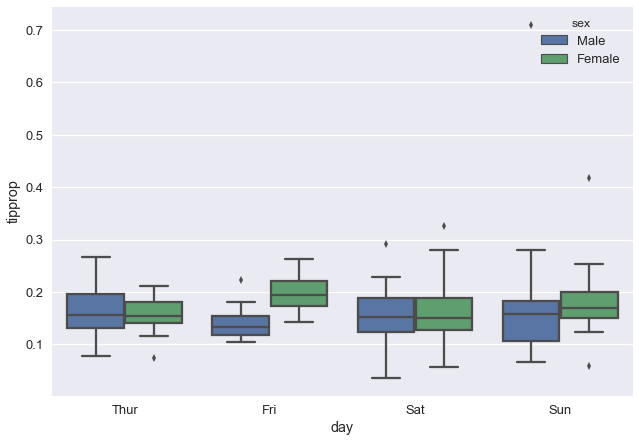

In [156]:
sns.boxplot(x="day", y="tipprop", data=tips,
            hue="sex")

#### Question?
Do we notice anything interesting/suspicious in this plot?

---

<br/><br/><br/><br/><br/><br/>

# violinplot

The violin plot is lot like the box plot but with a continuous density estimator

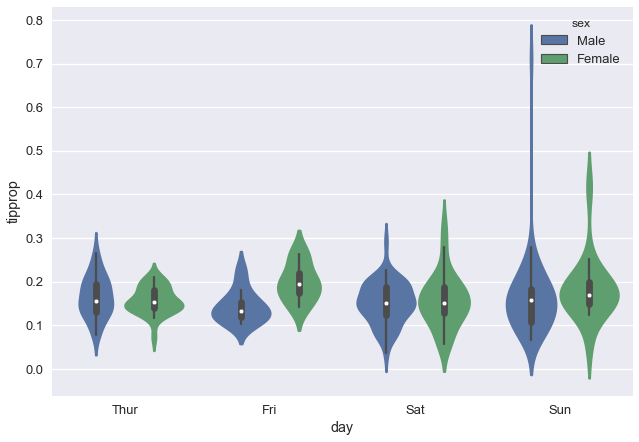

In [157]:
sns.violinplot(x="day", y="tipprop", data=tips,
    hue="sex")

### Additional options for Violin Plot

The Violin plot takes several additional options that can further improve our ability to relate the two datasets and visualize the raw data.

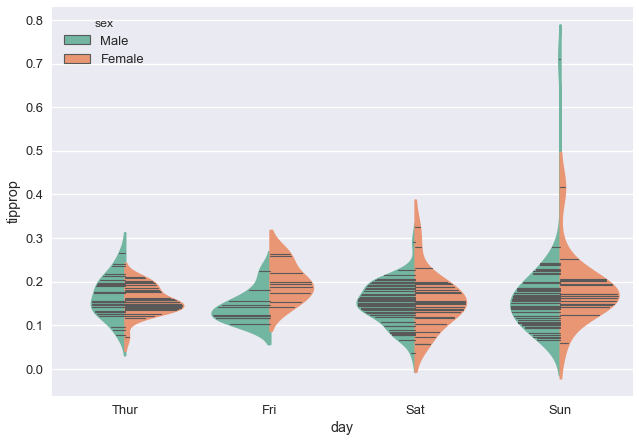

In [158]:
sns.violinplot(x="day", y="tipprop", data=tips,
    hue="sex", 
    split=True, # Place the two variables side by side
    inner="stick", # show a "rug" plot along each side (also try quartile)
    palette="Set2" # a Lighter color palette
  )

---

<br/><br/><br/><br/><br/><br/>


# barplot

The Bar Plot is like the standard matplotlib bar plot except that if there are multiple observations with the same X value than the average is plotted along with a bootstrap confidence interval.

In [159]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Plotting the titanic data by gender and class to visualize the mean survival.

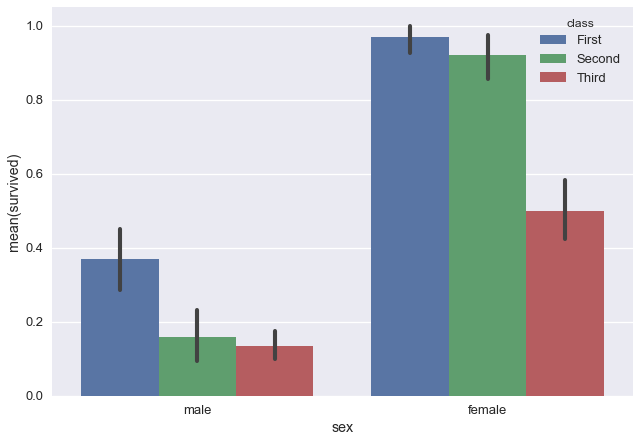

In [160]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

### What can we learn from this plot?